[![Roboflow Notebooks](https://media.roboflow.com/notebooks/template/bannertest2-2.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672932710194)](https://github.com/roboflow/notebooks)

# How to Train YOLOv8 Object Detection on a Custom Dataset
(YOLOv8 객체 탐지를 사용자 정의 데이터셋에서 학습하는 방법)
---

[![Roboflow](https://raw.githubusercontent.com/roboflow-ai/notebooks/main/assets/badges/roboflow-blogpost.svg)](https://blog.roboflow.com/how-to-train-yolov8-on-a-custom-dataset)
[![YouTube](https://badges.aleen42.com/src/youtube.svg)](https://youtu.be/wuZtUMEiKWY)
[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/ultralytics/ultralytics)

Ultralytics YOLOv8은 Ultralytics에서 개발한 YOLO(You Only Look Once) 객체 탐지 및 이미지 분할 모델의 최신 버전입니다. YOLOv8 모델은 빠르고 정확하며 사용하기 쉽게 설계되어 다양한 객체 탐지 및 이미지 분할 작업에 적합한 선택입니다. 이 모델은 대규모 데이터셋에서 학습할 수 있으며, CPU에서 GPU까지 다양한 하드웨어 플랫폼에서 실행이 가능합니다.

## ⚠️ Disclaimer (면책 조항)

YOLOv8은 여전히 활발히 개발 중입니다. 거의 매주 주요 변경 사항이 도입되고 있습니다. 우리는 YOLOv8 노트북이 최신 라이브러리 버전과 호환되도록 노력하고 있습니다. 마지막 테스트는 **2024년 1월 3일**에 **YOLOv8.0.196** 버전으로 수행되었습니다.

노트북이 올바르게 작동하지 않는 것을 발견하셨다면, 특히 튜토리얼을 진행하는 데 방해가 되는 오류를 겪으신 경우 주저하지 마세요! Roboflow Notebooks 저장소에 [이슈](https://github.com/roboflow/notebooks/issues)를 열어 알려주세요.

## 블로그 포스트와 함께

이 노트북을 진행하면서 YOLOv8 객체 탐지 학습에 관한 블로그 포스트를 동시에 읽는 것을 권장합니다.

## 전문가 팁: GPU 가속 사용

Google Colab에서 이 노트북을 실행 중이라면, `수정` -> `노트북 설정` -> `하드웨어 가속기`로 이동하여, 이를 `GPU`로 설정한 후 `저장`을 클릭하세요. 이렇게 하면 노트북이 GPU를 사용하게 되어 모델 학습 시간이 크게 단축됩니다.

## 튜토리얼 단계

이 튜토리얼에서 다룰 내용은 다음과 같습니다:

- 시작하기 전에
- YOLOv8 설치
- CLI 기본 사항
- 사전 학습된 COCO 모델로 추론하기
- Roboflow Universe
- 사용자 정의 데이터셋 준비
- 사용자 정의 학습
- 사용자 정의 모델 검증
- 사용자 정의 모델로 추론하기

**Let's begin!**


## Before you start

GPU에 접근할 수 있는지 확인해 봅시다. 이를 위해 `nvidia-smi` 명령어를 사용할 수 있습니다. 문제가 발생할 경우 `수정` -> `노트북 설정` -> `하드웨어 가속기`로 이동하여, 이를 `GPU`로 설정한 후 `저장`을 클릭하세요.

In [1]:
!nvidia-smi

Wed Nov 13 09:43:21 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

⚠️ YOLOv8은 여전히 활발히 개발 중입니다. 거의 매주 주요 변경 사항이 도입되고 있습니다. 우리는 YOLOv8 노트북이 최신 라이브러리 버전과 호환되도록 노력하고 있습니다. 마지막 테스트는 2024년 1월 3일에 YOLOv8.0.196 버전으로 수행되었습니다.

노트북이 올바르게 작동하지 않는 것을 발견하셨다면, 특히 튜토리얼을 진행하는 데 방해가 되는 오류를 겪으신 경우 주저하지 마세요! Roboflow Notebooks 저장소에 이슈를 열어 알려주세요.

YOLOv8은 두 가지 방법으로 설치할 수 있습니다 - 소스에서 설치하거나 pip을 통해 설치할 수 있습니다. 이는 YOLO의 첫 공식 패키지 버전이기 때문입니다.

In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.4/112.6 GB disk)


In [4]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -e .

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [5]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics

모델을 학습, 검증 또는 추론을 실행하려고 하며 코드를 수정할 필요가 없는 경우, YOLO 명령줄 인터페이스(CLI)를 사용하는 것이 가장 쉬운 방법입니다. CLI에 대한 자세한 내용은 Ultralytics YOLO 문서를 참조하세요.

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Inference with Pre-trained COCO Model

### 💻 CLI

`yolo mode=predict`는 다양한 소스에서 YOLOv8 추론을 실행하며, 최신 YOLOv8 릴리스에서 자동으로 모델을 다운로드하고 결과를 `runs/predict`에 저장합니다.

In [6]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov5n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

/content
PRO TIP 💡 Replace 'model=yolov5n.pt' with new 'model=yolov5nu.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.

100% 5.27M/5.27M [00:00<00:00, 67.3MB/s]
/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via

/content


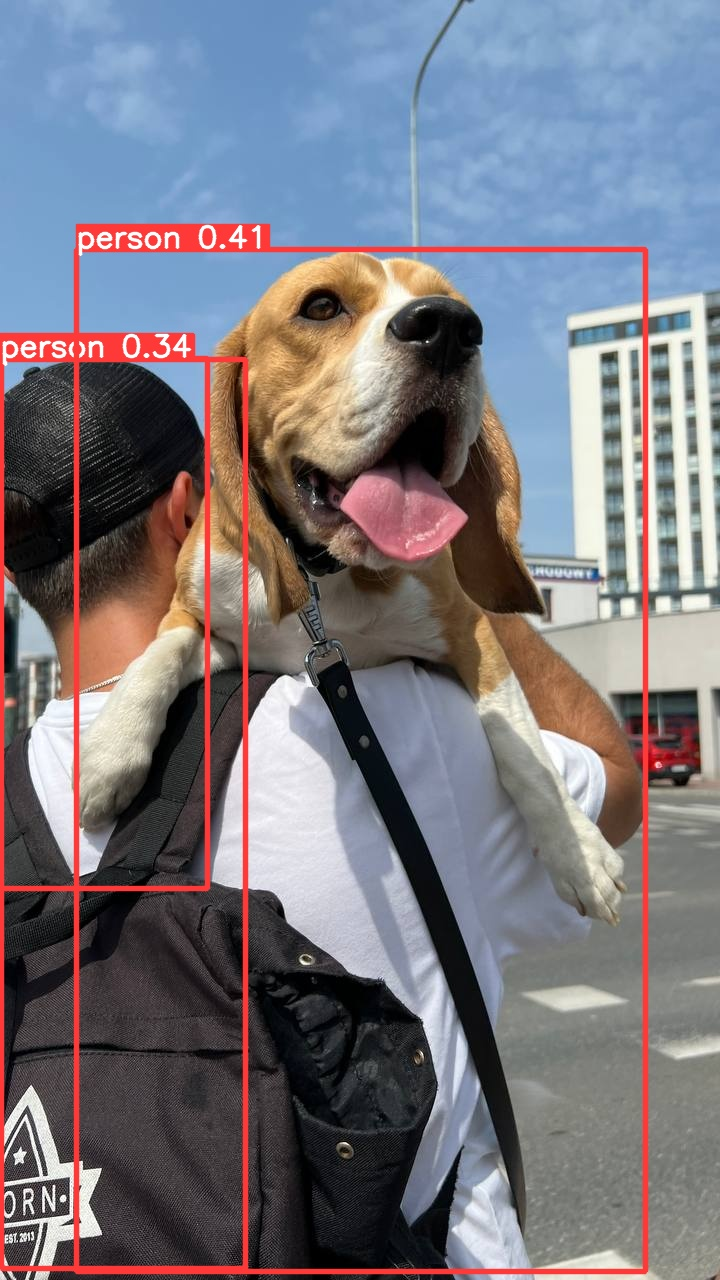

In [7]:
%cd {HOME}
Image(filename='runs/detect/predict/dog.jpeg', height=600)

### 🐍 Python SDK

YOLOv8을 Python 환경에서 직접 사용하는 가장 간단한 방법.

In [8]:
model = YOLO(f'{HOME}/yolov5n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)

PRO TIP 💡 Replace 'model=/content/yolov5n.pt' with new 'model=/content/yolov5nu.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_g

In [9]:
results[0].boxes.xyxy

tensor([[7.6714e+01, 2.4955e+02, 6.4550e+02, 1.2720e+03],
        [9.5668e-01, 3.5873e+02, 2.0782e+02, 8.8811e+02],
        [1.9432e+00, 3.5978e+02, 2.4556e+02, 1.2681e+03]], device='cuda:0')

In [10]:
results[0].boxes.conf

tensor([0.4057, 0.3389, 0.3351], device='cuda:0')

In [11]:
results[0].boxes.cls

tensor([0., 0., 0.], device='cuda:0')

## Roboflow Universe

프로젝트에 데이터가 필요하신가요? 주석 작업에 시간을 쓰기 전에, Roboflow Universe를 확인해보세요. 이곳에는 110,000개 이상의 오픈소스 데이터셋이 있는 저장소가 있으며, 콘크리트 균열 주석부터 질병 주석이 포함된 식물 이미지까지 다양한 데이터셋을 찾을 수 있습니다.

[![Roboflow Universe](https://media.roboflow.com/notebooks/template/uni-banner-frame.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672878480290)](https://universe.roboflow.com/)



## Preparing a custom dataset

커스텀 데이터셋을 구축하는 과정은 어려울 수 있습니다. 이미지를 수집하고, 라벨링하고, 적절한 형식으로 내보내는 데 수십 또는 수백 시간이 걸릴 수 있습니다. 다행히도, Roboflow는 이 과정을 최대한 간단하고 빠르게 만들어줍니다. 제가 방법을 알려드릴게요!

1단계: 프로젝트 생성  
시작하기 전에 Roboflow 계정을 생성해야 합니다. 계정을 생성한 후 Roboflow 대시보드에서 새 프로젝트를 만들 수 있습니다. 이때 올바른 프로젝트 유형을 선택하는 것이 중요합니다. 우리의 경우는 객체 감지(Object Detection)입니다.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/creating-project.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672929799852"
  >
</div>

### Step 2: Uploading images

다음으로, 새로 만든 프로젝트에 데이터를 추가하세요. API를 통해서나 [웹 인터페이스](https://docs.roboflow.com/adding-data/object-detection)를 통해 데이터를 추가할 수 있습니다.

지원되는 형식의 데이터셋 디렉토리를 드래그 앤 드롭하면, Roboflow 대시보드가 이미지와 주석을 자동으로 함께 읽어들입니다.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/uploading-images.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672929808290"
  >
</div>

### Step 3: Labeling

이미지만 가지고 있다면, [Roboflow Annotate](https://docs.roboflow.com/annotate)에서 라벨링할 수 있습니다.

<div align="center">
  <img
    width="640"
    src="https://user-images.githubusercontent.com/26109316/210901980-04861efd-dfc0-4a01-9373-13a36b5e1df4.gif"
  >
</div>

### 4단계: 새로운 데이터셋 버전 생성

이제 이미지와 주석을 추가했으니, 데이터셋 버전을 생성할 수 있습니다. 버전을 생성할 때 전처리 및 증강을 추가할 수 있습니다. 이 단계는 완전히 선택 사항이지만, 모델의 견고성을 크게 향상시킬 수 있습니다.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/generate-new-version.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1673003597834"
  >
</div>

### 5단계: 데이터셋 내보내기

데이터셋 버전이 생성되면, 노트북에서 쉽게 학습할 수 있도록 직접 불러올 수 있는 호스팅된 데이터셋이 준비됩니다. `Export`를 클릭한 다음, `YOLO v5 PyTorch` 데이터셋 형식을 선택하세요.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/export.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672943313709"
  >
</div>




In [12]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="xnourAA8qbEYZy2YkF75")
project = rf.workspace("heasun8583-gmail-com").project("korean-food_yolov5")
version = project.version(6)
dataset = version.download("yolov8")

/content/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.5 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Korean-Food_yolov5-6 in yolov8:: 100%|██████████| 5271/5271 [00:01<00:00, 3366.18it/s]


## Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8n.pt data=/content/datasets/Korean-Food_yolov5-6/data.yaml epochs=25 imgsz=800 plots=True

/content
100% 6.23M/6.23M [00:00<00:00, 72.9MB/s]
/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return t

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml  weights


In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/confusion_matrix.png', width=600)

/content


FileNotFoundError: [Errno 2] No such file or directory: '/content/runs/detect/train2/confusion_matrix.png'

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/results.png', width=600)

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train2/weights/best.pt data={dataset.location}/data.yaml

## Inference with Custom Model (커스텀 모델을 사용한 추론)

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source=/content/test2.mp4 save=True

**NOTE:** Let's take a look at few results.

In [ ]:
import glob
from IPython.display import Image, display

# Define the base path where the folders are located
base_path = '/content/runs/detect/'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[:3]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")

In [ ]:
!zip -r yolo5baseline.zip /content/runs/detect/

## Roboflow에 모델 배포

YOLOv8 모델의 학습이 완료되면, 사용할 준비가 된 학습된 가중치가 생성됩니다. 이 가중치는 프로젝트의 `/runs/detect/train/weights/best.pt` 폴더에 저장됩니다. 이 모델 가중치를 Roboflow Deploy에 업로드하여 우리의 무한 확장 가능한 인프라에서 사용할 수 있습니다.

[Roboflow pip 패키지](https://docs.roboflow.com/python)의 `.deploy()` 함수는 이제 YOLOv8 가중치 업로드를 지원합니다.

모델 가중치를 업로드하려면, 위에서 언급한 노트북의 “커스텀 모델을 사용한 추론” 섹션에 다음 코드를 추가하세요:

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train4/")

In [ ]:
#While your deployment is processing, checkout the deployment docs to take your model to most destinations https://docs.roboflow.com/inference

In [ ]:
#Run inference on your model on a persistant, auto-scaling, cloud API

#load model
model = project.version(dataset.version).model

#choose random test set image
import os, random
test_set_loc = dataset.location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
pred

# 모델을 엣지에서 배포하기

Roboflow 호스팅 API를 사용한 배포 외에도, [Roboflow Inference](https://inference.roboflow.com)를 활용할 수 있습니다. Roboflow Inference는 오픈 소스 추론 솔루션으로, 수백만 건의 API 호출을 지원하는 생산 환경에서 사용되었습니다. 이 추론 솔루션은 CPU와 GPU에서 모두 작동하여 NVIDIA Jetson, TRT 호환 장치, ARM CPU 장치 등 다양한 장치에서 즉시 접근할 수 있게 해줍니다.

Roboflow Inference를 사용하면, 모델을 자체 호스팅하고 장치에서 직접 배포할 수 있습니다. [Inference Docker 컨테이너](https://inference.roboflow.com/quickstart/docker/)나 pip 패키지를 사용하여 애플리케이션을 배포할 수 있습니다.

예를 들어, NVIDIA GPU가 장착된 장치에 Inference를 설치하려면, 다음과 같은 명령어를 사용할 수 있습니다:

```
docker pull roboflow/roboflow-inference-server-gpu
```

Then we can run inference via HTTP:

```python
import requests

workspace_id = ""
model_id = ""
image_url = ""
confidence = 0.75
api_key = ""

infer_payload = {
    "image": {
        "type": "url",
        "value": image_url,
    },
    "confidence": confidence,
    "iou_threshold": iou_thresh,
    "api_key": api_key,
}
res = requests.post(
    f"http://localhost:9001/{workspace_id}/{model_id}",
    json=infer_object_detection_payload,
)

predictions = res.json()
```

위에서 Roboflow 워크스페이스 ID, 모델 ID, API 키를 설정하세요.

- [워크스페이스 및 모델 ID 찾기](https://docs.roboflow.com/api-reference/workspace-and-project-ids?ref=blog.roboflow.com)
- [API 키 찾기](https://docs.roboflow.com/api-reference/authentication?ref=blog.roboflow.com#retrieve-an-api-key)

또한, 추론을 실행할 이미지의 URL을 설정하세요. 이는 로컬 파일일 수도 있습니다.

_YOLOv5 모델을 상업적으로 사용하려면 Roboflow Enterprise 라이센스가 필요합니다. 이 라이센스를 통해 YOLOv5 사용에 대한 패스-스루 라이센스를 받을 수 있습니다. Enterprise 라이센스는 또한 고급 장치 관리, 다중 모델 컨테이너, 자동 배치 추론 등의 기능에 대한 액세스를 제공합니다._

## 🏆 Congratulations

### Learning Resources

Roboflow는 컴퓨터 비전 지식을 확장하는 데 유용한 다양한 리소스를 제공합니다:

- [Roboflow Notebooks](https://github.com/roboflow/notebooks): YOLOv7부터 SegFormer까지 다양한 모델 유형으로 커스텀 모델을 학습하는 방법을 안내하는 20개 이상의 노트북이 포함된 저장소입니다.
- [Roboflow YouTube](https://www.youtube.com/c/Roboflow): 컴퓨터 비전의 최신 동향에 대한 깊이 있는 분석, 노트북에 수반된 상세한 튜토리얼 등 다양한 동영상 라이브러리를 제공합니다.
- [Roboflow Discuss](https://discuss.roboflow.com/): Roboflow에서 어떻게 해야 할지 궁금한 점이 있으면, 논의 포럼에서 질문하세요.
- [Roboflow Models](https://roboflow.com): 최신 모델과 그 성능에 대해 배우고, 학습을 안내하는 링크와 튜토리얼을 찾아보세요.

### 데이터 형식 변환

Roboflow는 인기 있는 컴퓨터 비전 형식 간의 데이터 변환을 위한 무료 유틸리티를 제공합니다. [Roboflow Formats](https://roboflow.com/formats)에서 몇 번의 클릭으로 데이터 형식을 변환하는 방법에 대한 튜토리얼을 확인하세요.

### 프로젝트 로직에 컴퓨터 비전 연결하기

[Roboflow Templates](https://roboflow.com/templates)에서는 컴퓨터 비전을 프로젝트 로직에 연결할 수 있는 코드 스니펫을 공개적으로 제공합니다. 스니펫은 추론 후 이메일 보내기부터 객체 감지 간 거리 측정에 이르기까지 다양합니다.